In [371]:
import numpy as np
import os 
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage import filters
from skimage.filters import meijering, sato, frangi, hessian
from skimage.transform import resize
import copy
import cv2
import skimage as sk

In [247]:
path = "./data/awake mouse 300fps_frames/"

In [387]:
def binarize(data, threshold): 
    data[data > threshold] = 1
    data[data <= threshold] = 0
    return data

In [433]:
def normalize(data): 
    mindata = np.min(data)
    maxdata = np.max(data)
    return (data-mindata)/(maxdata-mindata)

In [418]:
files = os.listdir(path)
print(len(files))
#print(files)
files.sort()
files = files[14660:14760]
print(len(files))
print(files)

60001
100
['00014659.tiff', '00014660.tiff', '00014661.tiff', '00014662.tiff', '00014663.tiff', '00014664.tiff', '00014665.tiff', '00014666.tiff', '00014667.tiff', '00014668.tiff', '00014669.tiff', '00014670.tiff', '00014671.tiff', '00014672.tiff', '00014673.tiff', '00014674.tiff', '00014675.tiff', '00014676.tiff', '00014677.tiff', '00014678.tiff', '00014679.tiff', '00014680.tiff', '00014681.tiff', '00014682.tiff', '00014683.tiff', '00014684.tiff', '00014685.tiff', '00014686.tiff', '00014687.tiff', '00014688.tiff', '00014689.tiff', '00014690.tiff', '00014691.tiff', '00014692.tiff', '00014693.tiff', '00014694.tiff', '00014695.tiff', '00014696.tiff', '00014697.tiff', '00014698.tiff', '00014699.tiff', '00014700.tiff', '00014701.tiff', '00014702.tiff', '00014703.tiff', '00014704.tiff', '00014705.tiff', '00014706.tiff', '00014707.tiff', '00014708.tiff', '00014709.tiff', '00014710.tiff', '00014711.tiff', '00014712.tiff', '00014713.tiff', '00014714.tiff', '00014715.tiff', '00014716.tiff', '00

In [419]:
data3D = []
for file in files: 
    if file.endswith(".tiff"):
        print(file)
        data = imread(path + file)
        data3D.append(data)
        print(np.shape(data))
        #plt.imshow(data)
        #plt.show()

00014659.tiff
(512, 640)
00014660.tiff
(512, 640)
00014661.tiff
(512, 640)
00014662.tiff
(512, 640)
00014663.tiff
(512, 640)
00014664.tiff
(512, 640)
00014665.tiff
(512, 640)
00014666.tiff
(512, 640)
00014667.tiff
(512, 640)
00014668.tiff
(512, 640)
00014669.tiff
(512, 640)
00014670.tiff
(512, 640)
00014671.tiff
(512, 640)
00014672.tiff
(512, 640)
00014673.tiff
(512, 640)
00014674.tiff
(512, 640)
00014675.tiff
(512, 640)
00014676.tiff
(512, 640)
00014677.tiff
(512, 640)
00014678.tiff
(512, 640)
00014679.tiff
(512, 640)
00014680.tiff
(512, 640)
00014681.tiff
(512, 640)
00014682.tiff
(512, 640)
00014683.tiff
(512, 640)
00014684.tiff
(512, 640)
00014685.tiff
(512, 640)
00014686.tiff
(512, 640)
00014687.tiff
(512, 640)
00014688.tiff
(512, 640)
00014689.tiff
(512, 640)
00014690.tiff
(512, 640)
00014691.tiff
(512, 640)
00014692.tiff
(512, 640)
00014693.tiff
(512, 640)
00014694.tiff
(512, 640)
00014695.tiff
(512, 640)
00014696.tiff
(512, 640)
00014697.tiff
(512, 640)
00014698.tiff
(512, 640)


In [422]:
#val = filters.threshold_otsu(data3D)
#print(np.min(data3D), val, np.max(data3D))
#data3D = binarize(data3D, val)
#print(np.shape(data3D))
datafragi=[]
datafragibinary=[]


data = np.array(data3D)[:,200:400,250:450]


print(np.shape(data))
for i in range(len(data[0])):
    #datafragi.append(hessian(data[i,...]))
    indata = resize(data[i,:,:], (2000,2000))
    #segmentation = frangi(indata,sigmas=(0,8), black_ridges=False)
    segmentation = meijering(indata,sigmas=(0.5,8), black_ridges=False)
    print(np.min(segmentation),np.mean(segmentation), np.max(segmentation))
    binarysegmentation = copy.deepcopy(segmentation)
    binarysegmentation = normalize(binarysegmentation)
    binarysegmentation = (binarize(binarysegmentation, 0.03))
    datafragi.append(segmentation)
    datafragibinary.append(binarysegmentation)
    #plt.figure(figsize=(15,5))
    #plt.subplot(1,3,1)
    #plt.imshow(indata[20:-20,20:-20])
    #plt.subplot(1,3,2)
    #plt.imshow(segmentation[20:-20,20:-20])
    #plt.subplot(1,3,3)
    #plt.imshow(binarysegmentation[20:-20,20:-20])
    #plt.show()

(100, 200, 200)
0.0 0.028801044885716772 1.0
0.0 0.028875653327070157 1.0
0.0 0.029177377627516828 1.0
0.0 0.02882885685316188 1.0
0.0 0.02907511717648305 1.0
0.0 0.02916398963884244 1.0
0.0 0.02874380131312163 1.0
0.0 0.028657377646415738 1.0
0.0 0.02877901787568389 1.0
0.0 0.028977776268147494 1.0
0.0 0.028436146784002282 1.0
0.0 0.028927585969208223 1.0
0.0 0.028997596765977324 1.0
0.0 0.028748235029701426 1.0
0.0 0.028930741204890628 1.0
0.0 0.028875206553352822 1.0
0.0 0.028850722790032292 1.0
0.0 0.028874590856047308 1.0
0.0 0.028833571140337487 1.0
0.0 0.028818160336552066 1.0
0.0 0.02890832400452463 1.0
0.0 0.028892288360674145 1.0
0.0 0.028984022584252603 1.0
0.0 0.028462211725893583 1.0
0.0 0.02910125003191911 1.0
0.0 0.028777572136652062 1.0
0.0 0.029095580567637502 1.0
0.0 0.028916388641062052 1.0
0.0 0.028941622188155703 1.0
0.0 0.028674916531093463 1.0
0.0 0.02850889178626981 1.0
0.0 0.028622860904957192 1.0
0.0 0.028761969097417354 1.0
0.0 0.02868651788813505 1.0
0.0 0.0

IndexError: index 100 is out of bounds for axis 0 with size 100

(100, 2000, 2000)


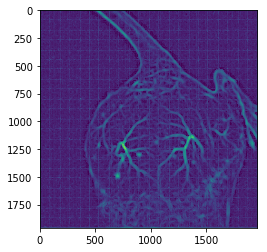

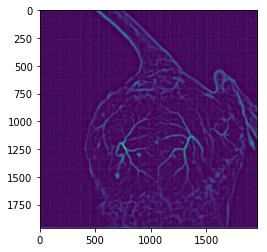

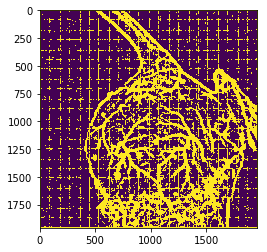

In [428]:
print(np.shape(datafragi))
maxplot = np.max(datafragi, axis = 0)
plt.imshow(maxplot[20:-20,20:-20])
plt.show()
meanplot = np.mean(datafragi, axis = 0)
plt.imshow(meanplot[20:-20,20:-20])
plt.show()
maxplotbinary = binarize(np.max(datafragi, axis = 0),0.03)
plt.imshow(maxplotbinary[20:-20,20:-20])
plt.show()


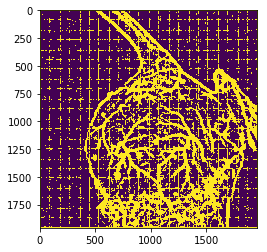

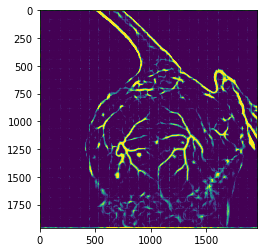

In [425]:
maxplot = np.max(datafragibinary, axis = 0)
plt.imshow(maxplot[20:-20,20:-20])
plt.show()
meanplot = np.mean(datafragibinary, axis = 0)
plt.imshow(meanplot[20:-20,20:-20])
plt.show()



In [430]:
print(np.shape(indata))

(2000, 2000)


In [434]:
imsave("./data/" + "mean_Vessel_Segmentation.tiff", (normalize(meanplot)*255).astype('uint8'))
imsave("./data/" + "original_Vessel_Segmentation.tiff", (normalize(indata)*255).astype('uint8'))



IndexError: index 7 is out of bounds for axis 0 with size 3

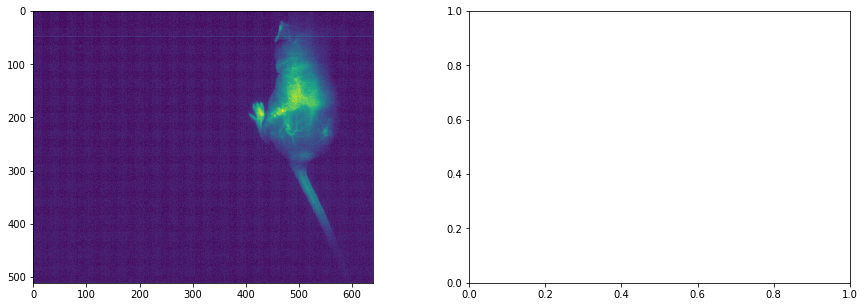

In [355]:
datafragi = np.array(datafragi)
data3D = np.array(data3D)

for i in range(7,10):
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(data3D[i,...])
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(datafragi[i,...])